# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [1]:
import cv2
import os
import requests
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanej biblioteki request), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [2]:
url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = 'lut.py'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

import lut

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

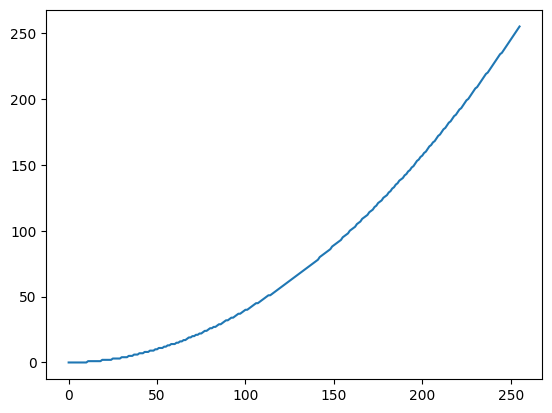

In [3]:
plt.plot(lut.kwadratowa)
plt.show()

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

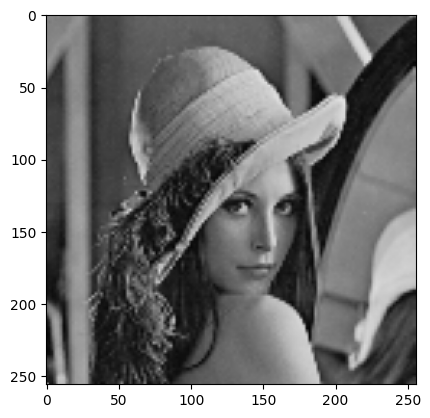

In [4]:
fileName = 'lena.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

img = cv2.imread('lena.bmp')
plt.imshow(img)
plt.show()

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

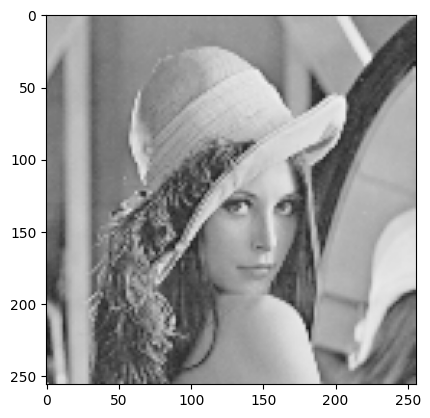

In [5]:
img_LUT = cv2.LUT(img, lut.pierwiastkowa)

plt.imshow(img_LUT)
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [6]:
def LUT(img, lut):
    img_LUT = lut[img]
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 8))
    
    ax1.plot(lut)
    ax2.imshow(img)
    ax3.imshow(img_LUT)
    
    ax1.set_aspect('equal')
    
    ax1.set_title('LUT')
    ax2.set_title('Original image')
    ax3.set_title('LUT image')
    
    plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

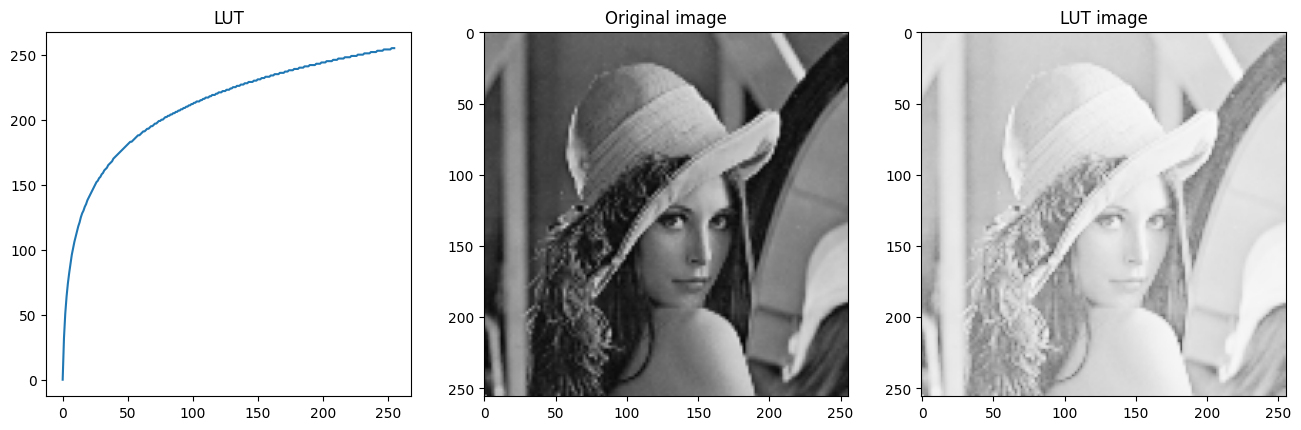

In [7]:
LUT(img, lut.log)

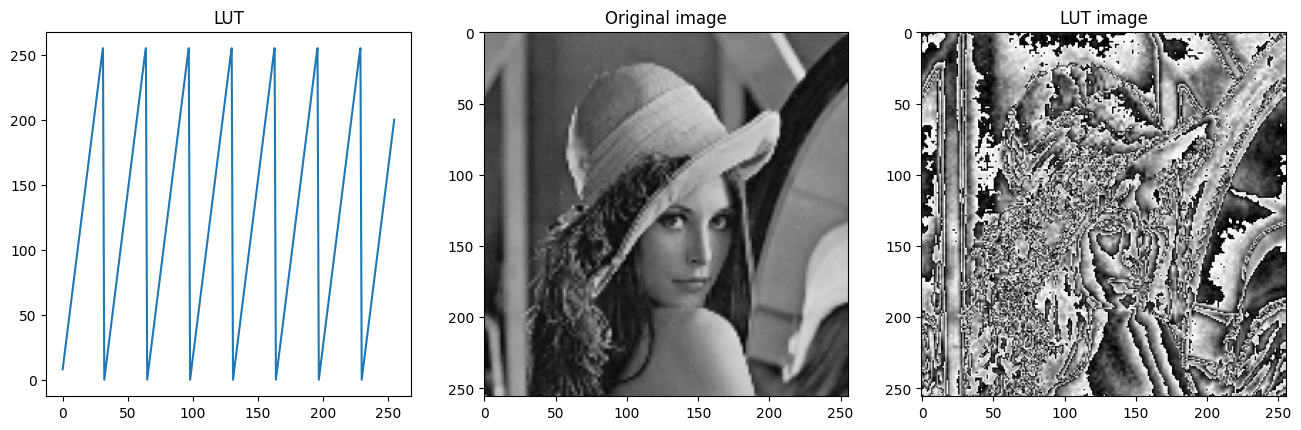

In [8]:
LUT(img, lut.pila)

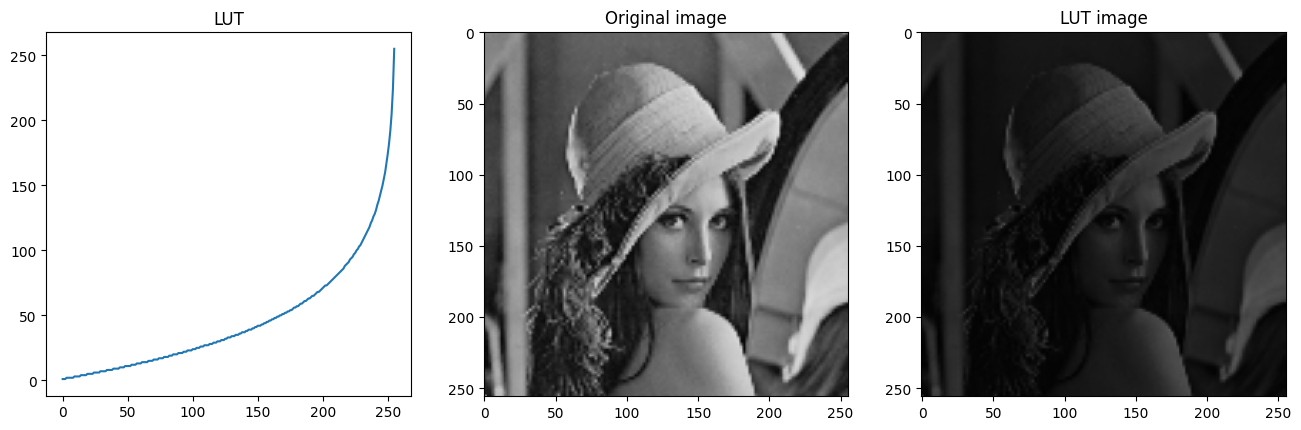

In [9]:
LUT(img, lut.odwlog)

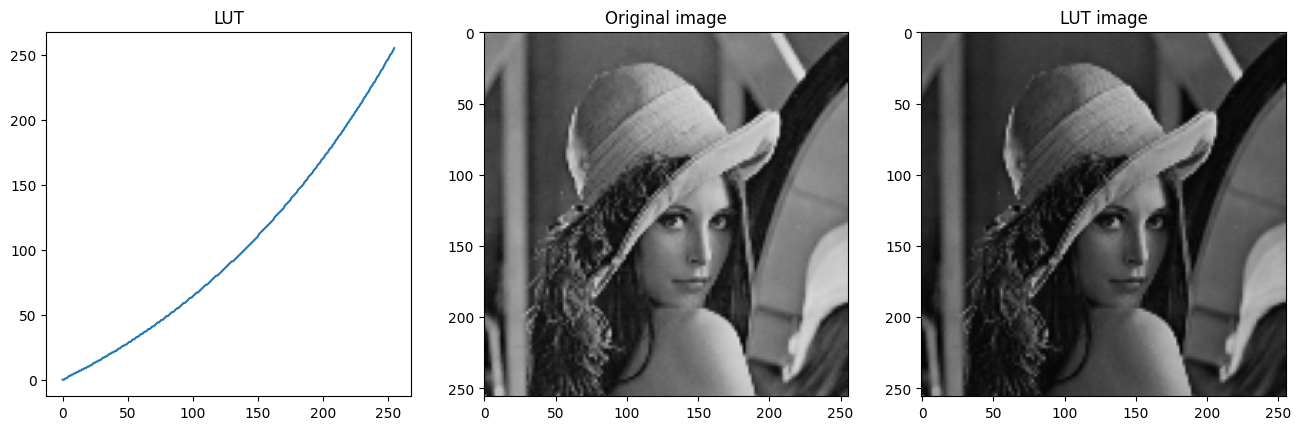

In [10]:
LUT(img, lut.wykladnicza)

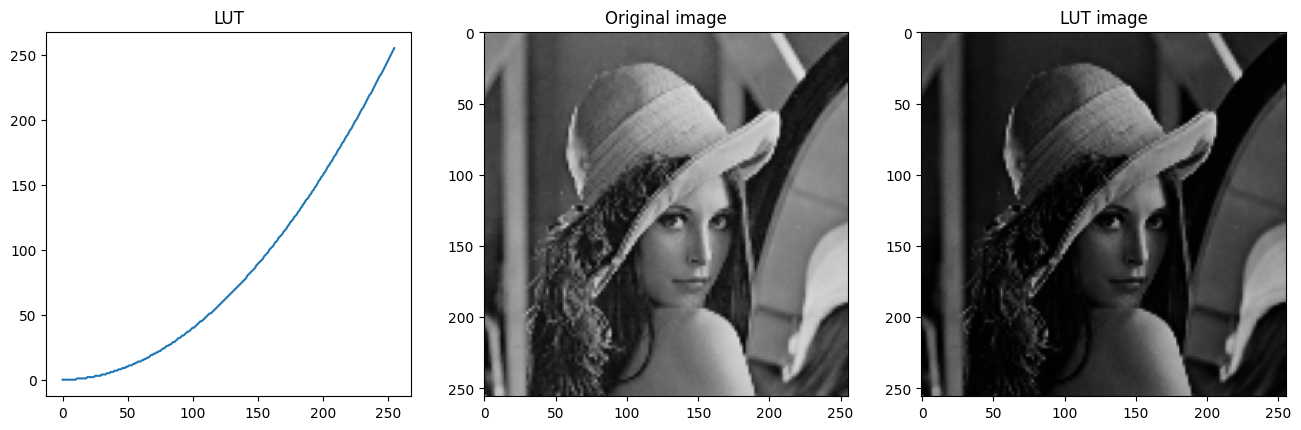

In [11]:
LUT(img, lut.kwadratowa)

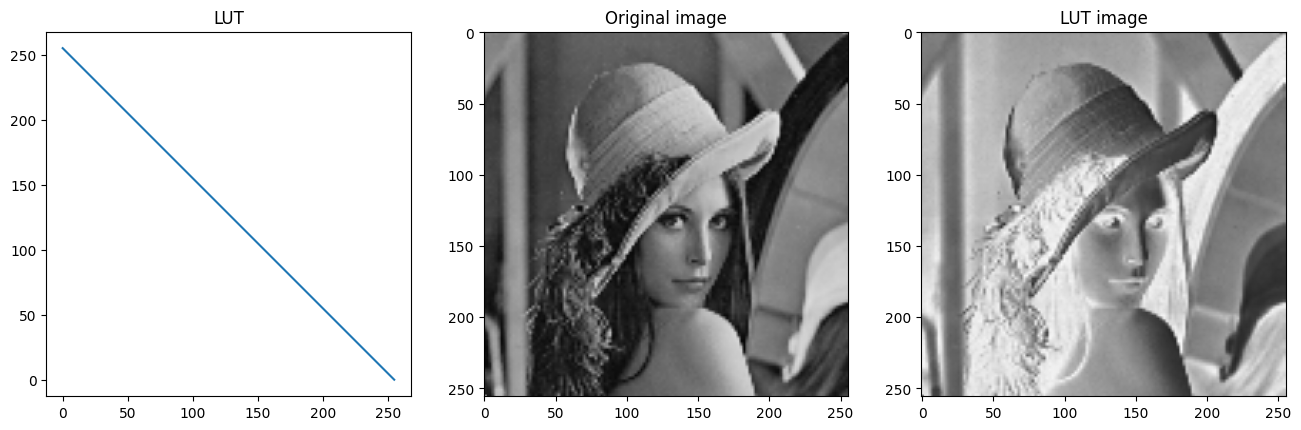

In [12]:
LUT(img, lut.odwrotna)

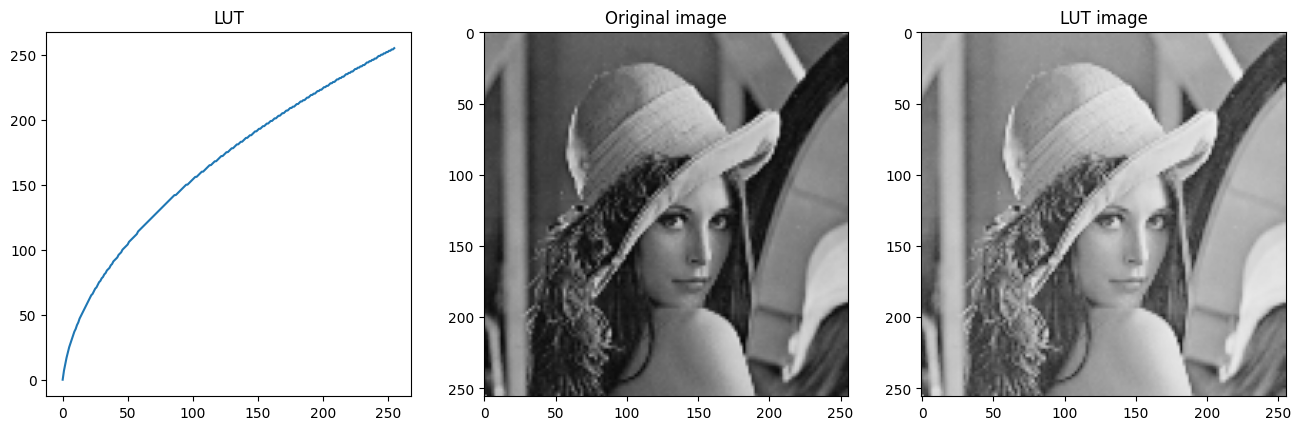

In [13]:
LUT(img, lut.pierwiastkowa)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

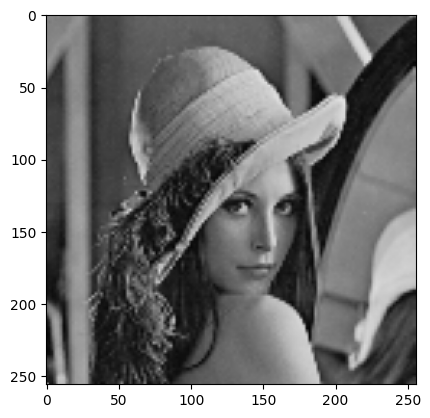

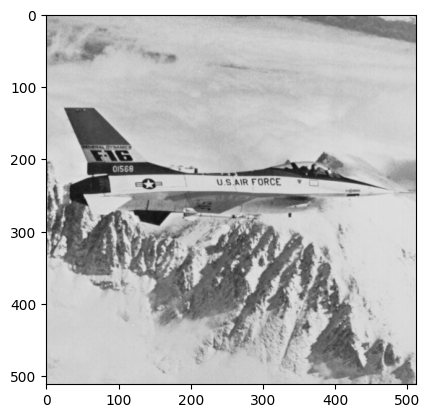

In [14]:
lena_img = cv2.imread('lena.bmp')
jet_img = cv2.imread('jet.bmp')

plt.imshow(lena_img)
plt.show()

plt.imshow(jet_img)
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

In [ ]:
img_add = cv2.add(lena_img, jet_img)

plt.imshow(img_add)
plt.show()

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`) dla arguemntów dodawania.
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić.
**Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki.**

In [ ]:
img_add = cv2.add(lena_img.astype('uint16'), jet_img.astype('uint16'))
img_add_scale = np.interp(img_add, (img_add.min(), img_add.max()), (0, 255)).astype('uint8')

plt.imshow(img_add_scale)
plt.show()

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

In [ ]:
for alpha in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    img_comb = cv2.addWeighted(lena_img, alpha, jet_img, 1 - alpha, 0)
    
    plt.imshow(img_comb)
    plt.title(f'Lena image $\\alpha = {alpha:.2f}$ | Jet image $\\beta = {1-alpha:.2f}$')
    plt.show()

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

In [ ]:
img_sub = cv2.subtract(lena_img, jet_img)

plt.imshow(img_sub)
plt.show()

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ argumentów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

In [ ]:
img_sub = cv2.subtract(lena_img.astype(np.int16), jet_img.astype(np.int16))

img_normal = np.abs(img_sub)

plt.imshow(img_normal)
plt.show()

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

Przed wykonaniem mnożenia zamień typ arguemntów na **float64**. Wynik mnożenia przeskaluj do zakresu 0-255, a następnie zrzutuj na typ **uint8**.

In [ ]:
img_multiply = cv2.multiply(lena_img.astype(np.float64), jet_img.astype(np.float64))

img_multiply = np.interp(img_multiply, (img_multiply.min(), img_multiply.max()), (0, 255)).astype(np.uint8)

plt.imshow(img_multiply)
plt.show()

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

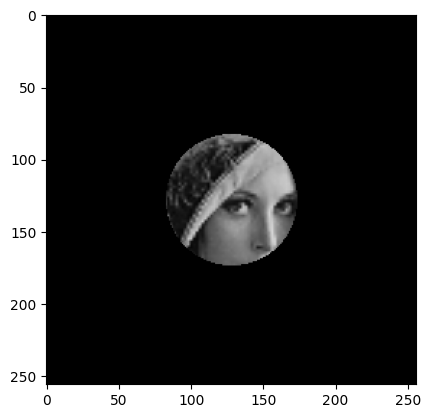

In [23]:
fileName = 'kolo.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

circle = cv2.imread('kolo.bmp')

img_mask = cv2.multiply(lena_img, circle.astype('bool').astype(np.uint8))

plt.imshow(img_mask)
plt.show()

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

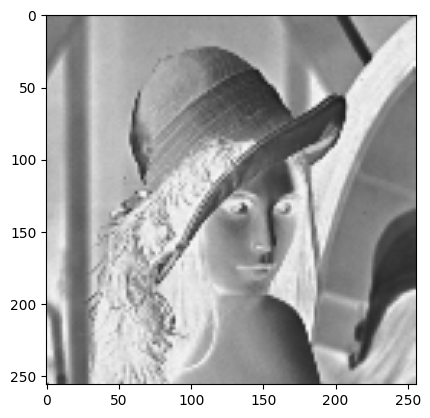

In [24]:
img_negative = cv2.bitwise_not(lena_img)

plt.imshow(img_negative)
plt.show()

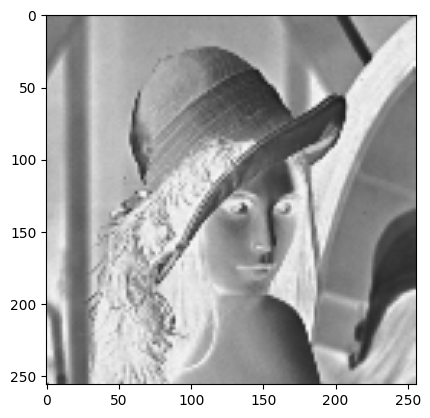

In [25]:
img_negative_LUT = cv2.LUT(img, lut.odwrotna)

plt.imshow(img_negative_LUT)
plt.show()

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

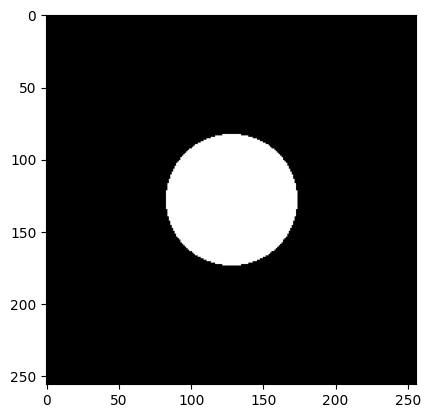

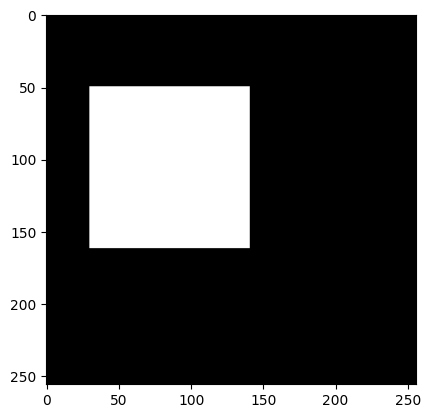

In [26]:
fileName = 'kwadrat.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

square = cv2.imread('kwadrat.bmp')

plt.imshow(circle)
plt.show()

plt.imshow(square)
plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

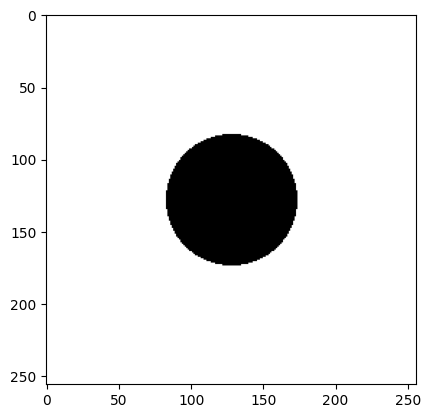

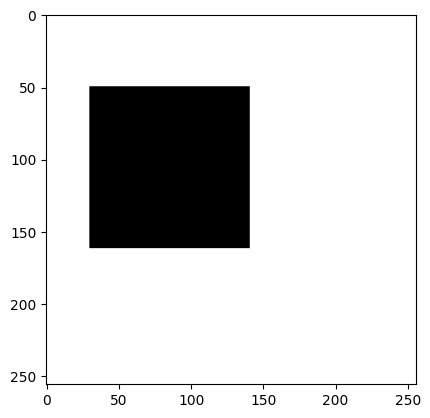

In [27]:
plt.imshow(~circle)
plt.show()

plt.imshow(~square)
plt.show()

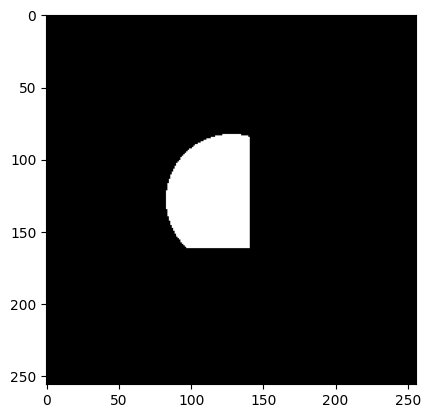

In [28]:
plt.imshow(circle & square)
plt.show()

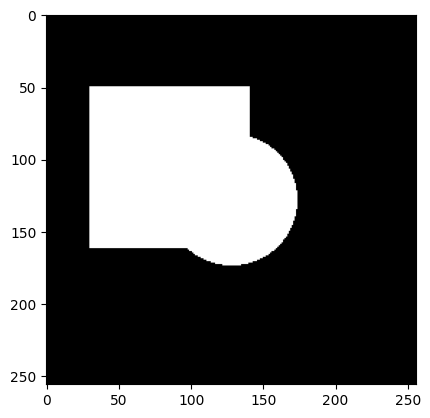

In [29]:
plt.imshow(circle | square)
plt.show()

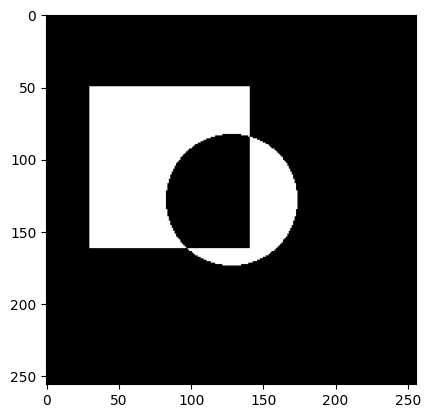

In [30]:
plt.imshow(circle ^ square)
plt.show()